# STAT207 Mini-Project #2 - Sleep Efficiency


Idunnuoluwa Akinola

## 1. Introduction


My projects is based on sleep efficiency, which is defined as how well we sleep.the majority of individuals in the society report having some sort of sleep issue during their lifetime and this also includes me, The primary research goal of this project is to build a predictive model that will perform the best when predicting sleep efficiency  for new datasets. additionally the secondary research goal of my project is to Ideally, we would like for our chosen model to also yield reliable interpretative insights about the nature of the relationship between the variables in the dataset. healthcare officials could use these predictions to determine the efficiency of sleepfor their patients


## 2. Dataset Discussion

I was able to get a sleep efficiency dataset from keggle, The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. The "Awakenings" feature records the number of times each subject wakes up during the night. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency. I downloaded this dataset from kaggle on 10/26/2023,here is the link to the dataset: kaggle datasets download -d equilibriumm/sleep-efficiency

In [243]:
#Run this
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  

In [244]:
df = pd.read_csv("Sleep_Efficiency.csv")
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [245]:
original_row_num=df.shape[0]
original_row_num

452

I want to check if there are any implicit  NA values in the dataset that could make the results different or biased and we have about 65 na values so we have to clean the dataset

In [246]:
df.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

## 3. Dataset Cleaning

We only intend to use on the sleep efficiency, gender , caffeine consumptiion, alchol consumption,smoking status and excersise frequency variables, so we are going to single these variables out and clean them to prevent any biased results. 

In [247]:
df2 = df[['Sleep efficiency', 'Gender', 'Caffeine consumption', 'Sleep duration', 'Smoking status','Exercise frequency']]
df2.head()

,Sleep efficiency,Gender,Caffeine consumption,Sleep duration,Smoking status,Exercise frequency
0,0.88,Female,0.0,6.0,Yes,3.0
1,0.66,Male,0.0,7.0,Yes,3.0
2,0.89,Female,0.0,8.0,No,3.0
3,0.51,Female,50.0,6.0,Yes,1.0
4,0.76,Male,0.0,8.0,No,3.0


In [248]:
num_original=df2.shape[0]
num_original

452

In [249]:
df2.isna().sum()

Sleep efficiency         0
Gender                   0
Caffeine consumption    25
Sleep duration           0
Smoking status           0
Exercise frequency       6
dtype: int64

In [250]:
df3=df2.dropna()

In [251]:
new_df=df3.shape[0]
new_df

421

In [252]:
# num of dropped rows
num_original-new_df

31

In [260]:
df3 = df[['Sleep efficiency', 'Caffeine consumption', 'Sleep duration', 'Smoking status', 'Exercise frequency']]
df3.rename(columns={'Sleep efficiency':'Sleep_efficiency', 'Caffeine consumption':'Caffeine_consumption', 'Sleep duration':'Sleep_duration', 'Smoking status':'Smoking_status', 'Exercise frequency':'Exercise_frequency'}, inplace=True)
df3

/var/folders/8q/07h3fzrs3z17bz7zwkw7jd4h0000gn/T/ipykernel_76669/4087108039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns={'Sleep efficiency':'Sleep_efficiency', 'Caffeine consumption':'Caffeine_consumption', 'Sleep duration':'Sleep_duration', 'Smoking status':'Smoking_status', 'Exercise frequency':'Exercise_frequency'}, inplace=True)


,Sleep_efficiency,Caffeine_consumption,Sleep_duration,Smoking_status,Exercise_frequency
0,0.88,0.0,6.0,Yes,3.0
1,0.66,0.0,7.0,Yes,3.0
2,0.89,0.0,8.0,No,3.0
3,0.51,50.0,6.0,Yes,1.0
4,0.76,0.0,8.0,No,3.0
...,...,...,...,...,...
447,0.91,0.0,7.5,No,5.0
448,0.74,25.0,6.0,No,3.0
449,0.55,NaN,8.5,Yes,0.0
450,0.76,0.0,7.0,No,3.0


## 4. Preliminary Analysis

we are going to create a pairplot for every numeric variables

In [261]:
g=df3[['Sleep_efficiency','Caffeine_consumption', 'Sleep_duration', 'Smoking_status','Exercise_frequency']]

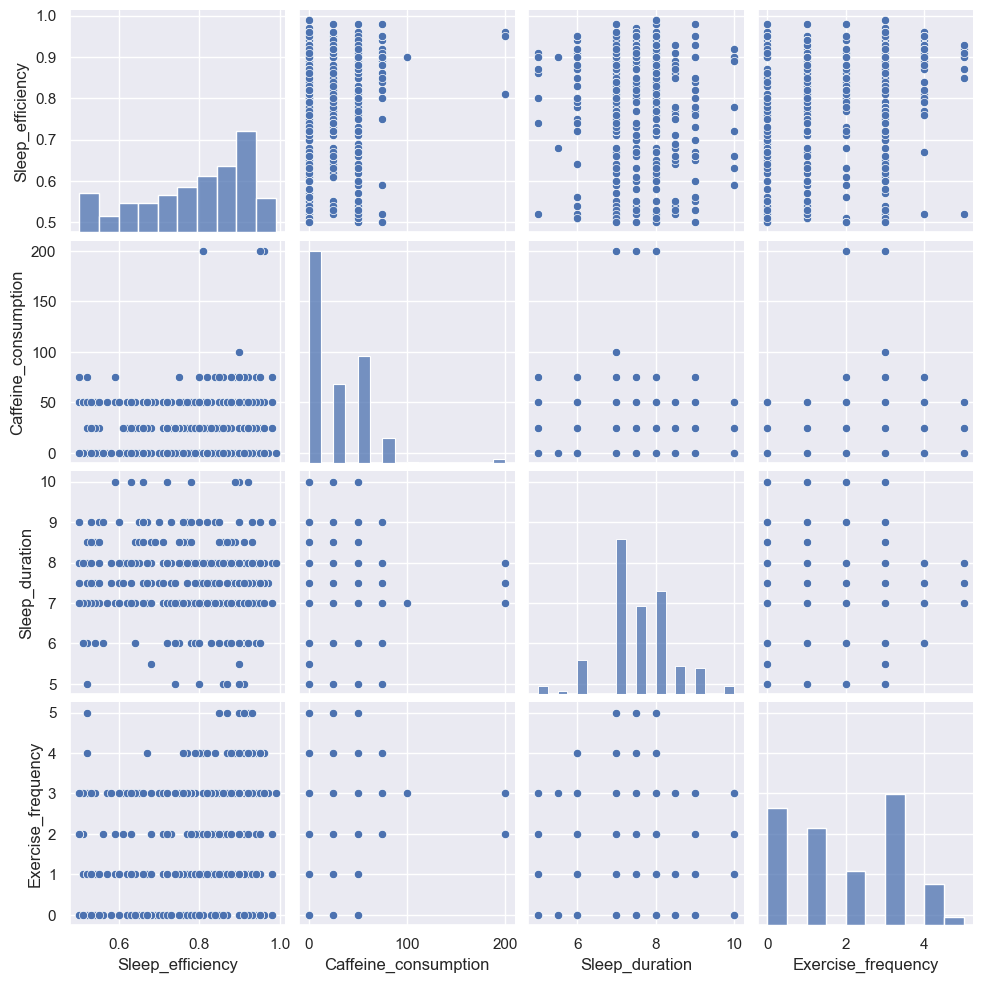

In [262]:
sns.pairplot(g)
plt.show()

 Show a fitted values vs. residuals plot for the linear regression model that predicts your response

In [263]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import math


In [271]:
df3 = df[['Sleep efficiency', 'Caffeine consumption','Gender','Sleep duration', 'Smoking status', 'Exercise frequency']]
df3.rename(columns={'Sleep efficiency':'Sleep_efficiency', 'Caffeine consumption':'Caffeine_consumption', 'Sleep duration':'Sleep_duration', 'Smoking status':'Smoking_status', 'Exercise frequency':'Exercise_frequency','Gender':'Gender'}, inplace=True)
df3

/var/folders/8q/07h3fzrs3z17bz7zwkw7jd4h0000gn/T/ipykernel_76669/524626694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns={'Sleep efficiency':'Sleep_efficiency', 'Caffeine consumption':'Caffeine_consumption', 'Sleep duration':'Sleep_duration', 'Smoking status':'Smoking_status', 'Exercise frequency':'Exercise_frequency','Gender':'Gender'}, inplace=True)


,Sleep_efficiency,Caffeine_consumption,Gender,Sleep_duration,Smoking_status,Exercise_frequency
0,0.88,0.0,Female,6.0,Yes,3.0
1,0.66,0.0,Male,7.0,Yes,3.0
2,0.89,0.0,Female,8.0,No,3.0
3,0.51,50.0,Female,6.0,Yes,1.0
4,0.76,0.0,Male,8.0,No,3.0
...,...,...,...,...,...,...
447,0.91,0.0,Female,7.5,No,5.0
448,0.74,25.0,Male,6.0,No,3.0
449,0.55,NaN,Female,8.5,Yes,0.0
450,0.76,0.0,Male,7.0,No,3.0


In [272]:
orig_model=smf.ols(formula='Sleep_efficiency~Caffeine_consumption+Gender+Sleep_duration+Smoking_status+Exercise_frequency',data=df3).fit()

In [273]:
orig_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep_efficiency   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     15.85
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           2.70e-14
Time:                        16:11:55   Log-Likelihood:                 282.86
No. Observations:                 421   AIC:                            -553.7
Df Residuals:                     415   BIC:                            -529.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7807      0.054     14.334      0.000       0.674       0.888
Gender[T.Male]            0.0021      0.013      0.157      0.875      -0.024       0.028
Smoking_status[T.Yes]    -0.0810      0.013     -6.235      0.000      -0.107      -0.055
Caffeine_consumption      0.0004      0.000      1.890      0.059   -1.66e-05       0.001
Sleep_duration           -0.0024      0.007     -0.340      0.734      -0.016       0.011
Exercise_frequency        0.0242      0.004      5.602      0.000       0.016       0.033
==============================================================================
Omnibus:                       55.534   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.743
Skew:                          -0.312   Prob(JB):                     3.13e-05
Kurtosis:                       2.110   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

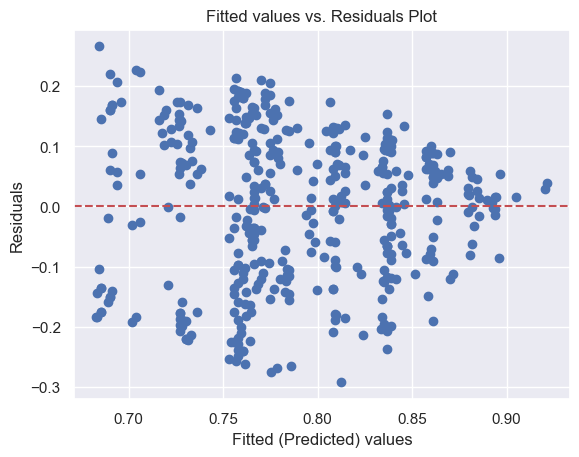

In [274]:
plt.scatter(orig_model.fittedvalues, orig_model.resid)
plt.axhline(y=0, color='r', linestyle='--') 
plt.xlabel('Fitted (Predicted) values') 
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot') 
plt.show()

create a new variable in your dataset that is the square root of the Exercise Frequency variable.

In [275]:
orig_model=smf.ols(formula='Sleep_efficiency~Caffeine_consumption+Gender+Sleep_duration+Smoking_status+Exercise_frequency',data=df3).fit()

In [277]:
df3['sqrt_Exercise_frequency']=np.sqrt(df3['Exercise_frequency']) 
df3.head()

/var/folders/8q/07h3fzrs3z17bz7zwkw7jd4h0000gn/T/ipykernel_76669/866318416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sqrt_Exercise_frequency']=np.sqrt(df3['Exercise_frequency'])


,Sleep_efficiency,Caffeine_consumption,Gender,Sleep_duration,Smoking_status,Exercise_frequency,sqrt_Exercise_frequency
0,0.88,0.0,Female,6.0,Yes,3.0,1.732051
1,0.66,0.0,Male,7.0,Yes,3.0,1.732051
2,0.89,0.0,Female,8.0,No,3.0,1.732051
3,0.51,50.0,Female,6.0,Yes,1.0,1.000000
4,0.76,0.0,Male,8.0,No,3.0,1.732051


New premilinary analysis with transformed variable

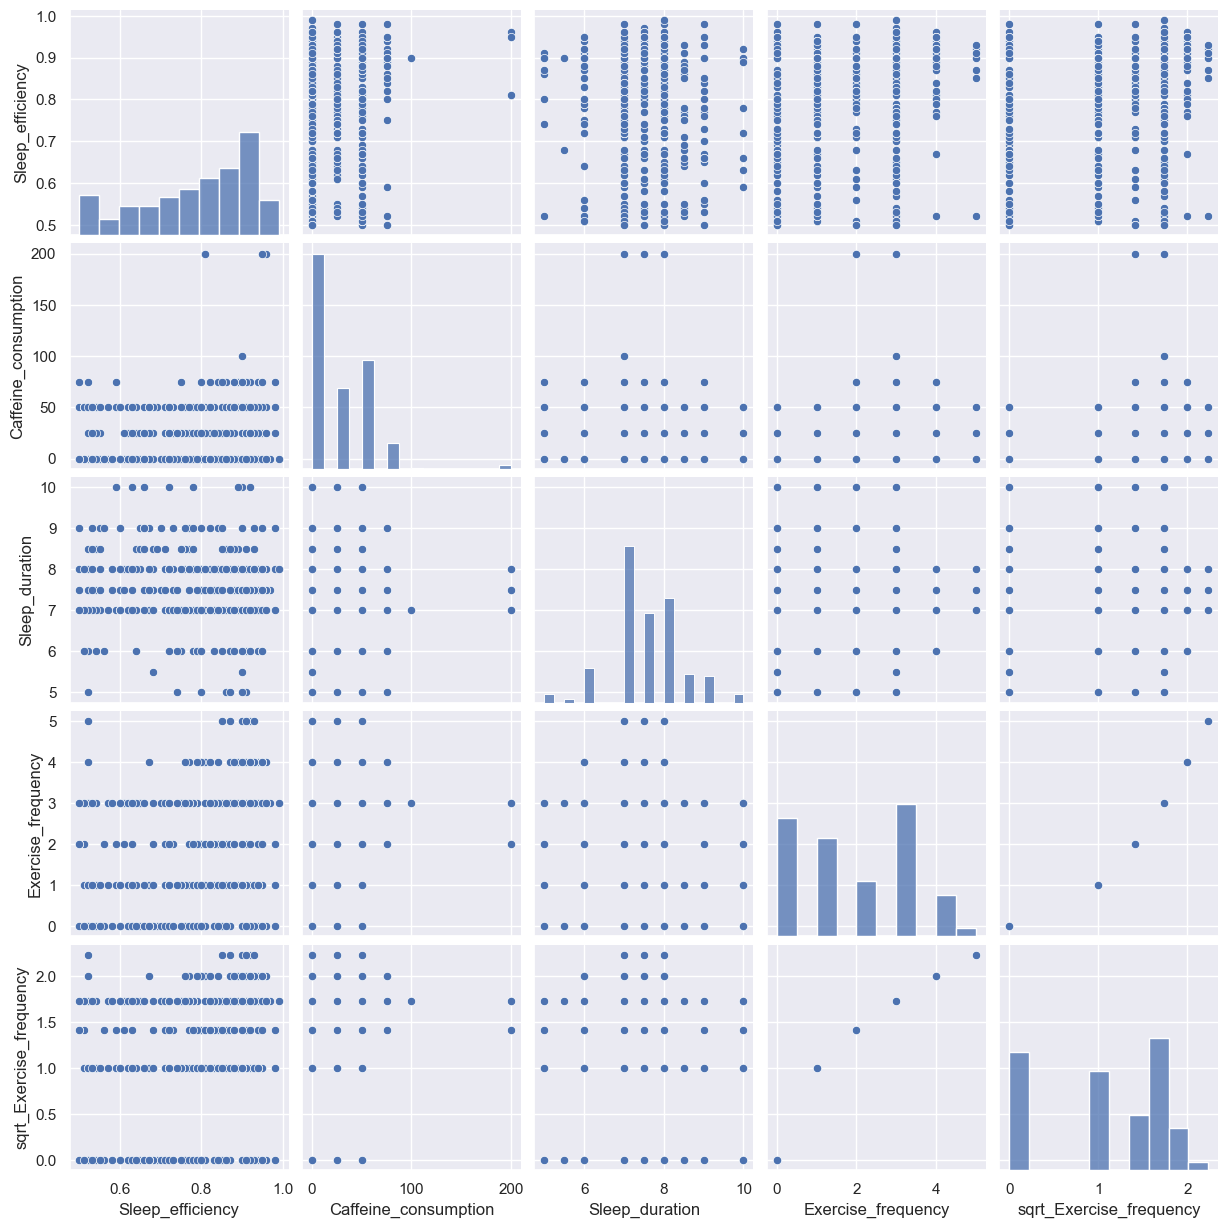

In [278]:
sns.pairplot(df3[['Sleep_efficiency','Gender','Caffeine_consumption','Sleep_duration','Smoking_status','Exercise_frequency', 'sqrt_Exercise_frequency']])
plt.show()

Next, fit a new model that predicts radius_mean with sleep efficiency, gender,caffiene consumption,sleep duration, smoking status and sqrt_Exercise_frequency


In [279]:
slr_model=smf.ols(formula='Sleep_efficiency~Caffeine_consumption+Gender+Sleep_duration+Smoking_status+sqrt_Exercise_frequency',data=df3).fit()

In [280]:
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep_efficiency   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     15.77
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           3.15e-14
Time:                        16:15:55   Log-Likelihood:                 282.70
No. Observations:                 421   AIC:                            -553.4
Df Residuals:                     415   BIC:                            -529.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.7759      0.055     14.194      0.000       0.668       0.883
Gender[T.Male]             -0.0011      0.013     -0.080      0.936      -0.027       0.025
Smoking_status[T.Yes]      -0.0852      0.013     -6.580      0.000      -0.111      -0.060
Caffeine_consumption        0.0003      0.000      1.410      0.159      -0.000       0.001
Sleep_duration             -0.0021      0.007     -0.307      0.759      -0.016       0.012
sqrt_Exercise_frequency     0.0468      0.008      5.572      0.000       0.030       0.063
==============================================================================
Omnibus:                       51.167   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.014
Skew:                          -0.310   Prob(JB):                     4.51e-05
Kurtosis:                       2.130   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

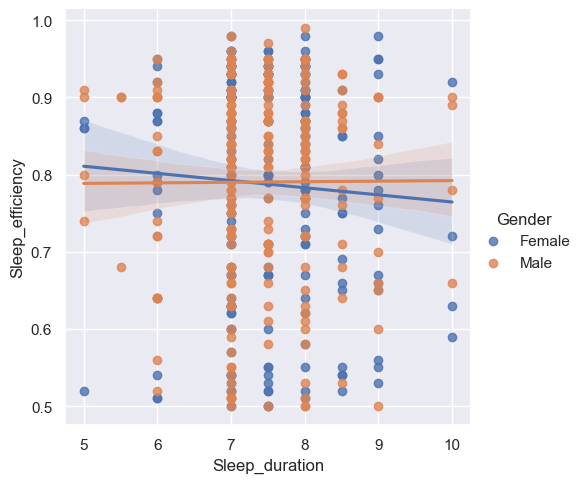

In [282]:
sns.lmplot(x='Sleep_duration', y='Sleep_efficiency', hue='Gender',data=df3)
plt.show()

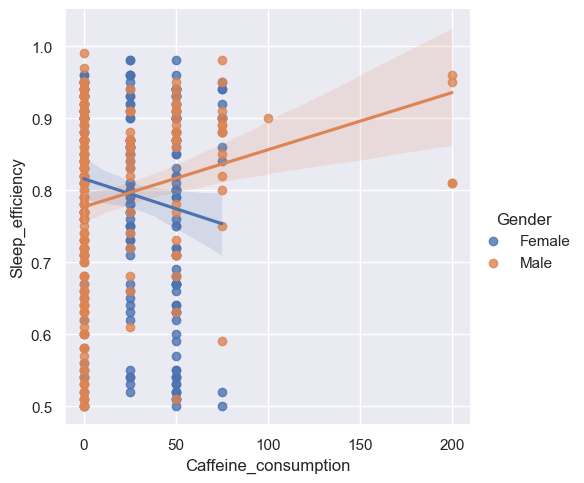

In [283]:
sns.lmplot(x='Caffeine_consumption', y='Sleep_efficiency', hue='Gender',data=df3)
plt.show()

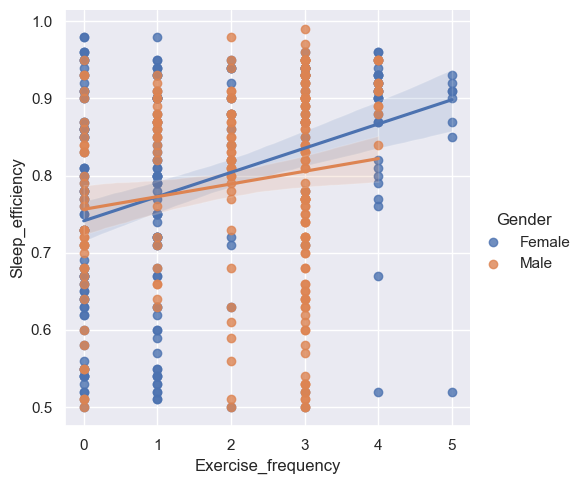

In [284]:
sns.lmplot(x='Exercise_frequency', y='Sleep_efficiency', hue='Gender',data=df3)
plt.show()

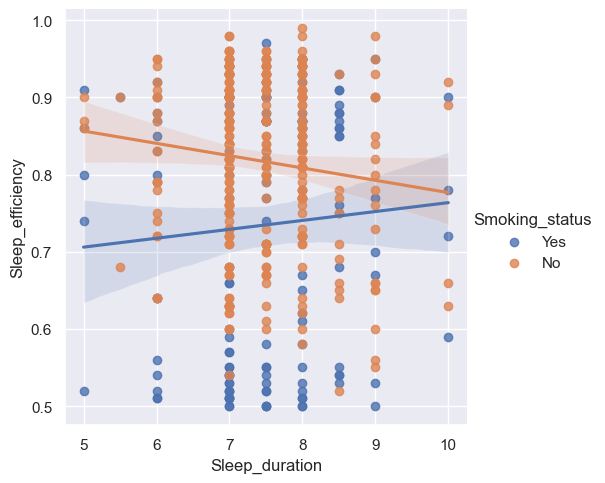

In [285]:
sns.lmplot(x='Sleep_duration', y='Sleep_efficiency', hue='Smoking_status',data=df3)
plt.show()

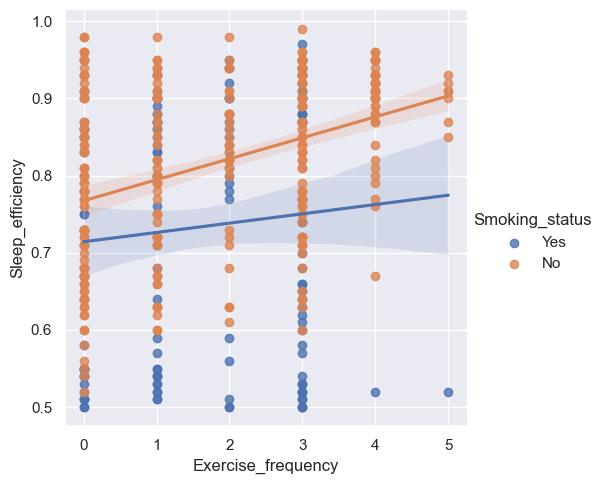

In [286]:
sns.lmplot(x='Exercise_frequency', y='Sleep_efficiency', hue='Smoking_status',data=df3)
plt.show()

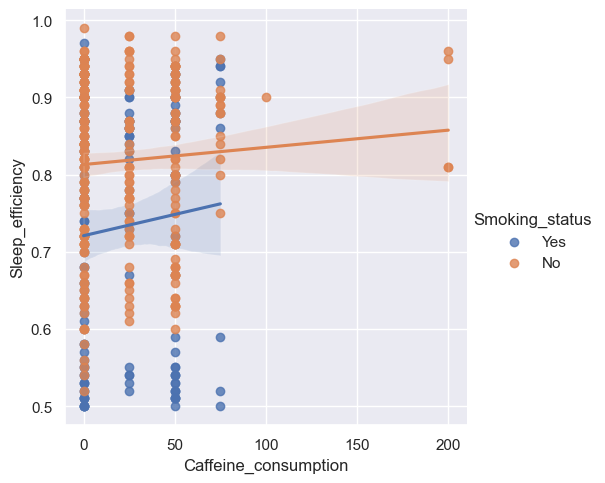

In [287]:
sns.lmplot(x='Caffeine_consumption', y='Sleep_efficiency', hue='Smoking_status',data=df3)
plt.show()

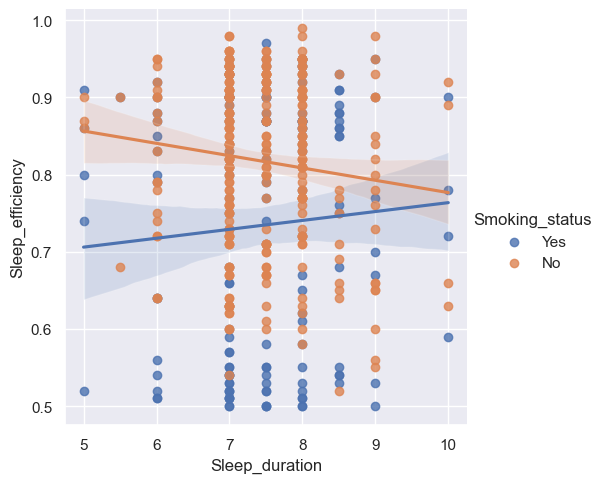

In [288]:
sns.lmplot(x='Sleep_duration', y='Sleep_efficiency', hue='Smoking_status',data=df3)
plt.show()

There is a large interaction between how exercise frequency and gender affect sleep efficiency

## 5. Predictive Models

Since our dataset has categorical explanatory variables AND you plan to use regularization, then we will need to create your own 0/1 indicator explanatory variables here 

In [289]:
df_with_ind = pd.get_dummies(df3, drop_first=True)
df_with_ind

,Sleep_efficiency,Caffeine_consumption,Sleep_duration,Exercise_frequency,sqrt_Exercise_frequency,Gender_Male,Smoking_status_Yes
0,0.88,0.0,6.0,3.0,1.732051,0,1
1,0.66,0.0,7.0,3.0,1.732051,1,1
2,0.89,0.0,8.0,3.0,1.732051,0,0
3,0.51,50.0,6.0,1.0,1.000000,0,1
4,0.76,0.0,8.0,3.0,1.732051,1,0
...,...,...,...,...,...,...,...
447,0.91,0.0,7.5,5.0,2.236068,0,0
448,0.74,25.0,6.0,3.0,1.732051,1,0
449,0.55,NaN,8.5,0.0,0.000000,0,1
450,0.76,0.0,7.0,3.0,1.732051,1,0


In [290]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_with_ind, test_size=0.15, random_state=101)
print(df_train.shape[0]/df3.shape[0])
df_train.head()

0.8495575221238938


,Sleep_efficiency,Caffeine_consumption,Sleep_duration,Exercise_frequency,sqrt_Exercise_frequency,Gender_Male,Smoking_status_Yes
98,0.80,25.0,9.0,0.0,0.000000,0,0
43,0.87,50.0,7.5,1.0,1.000000,0,0
36,0.87,0.0,7.0,3.0,1.732051,1,1
128,0.73,25.0,9.0,0.0,0.000000,0,0
100,0.81,25.0,8.0,0.0,0.000000,0,0


In [291]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_vars = scaler.fit_transform(df_train)
df_train[(df_train.columns)] = scaled_vars
df_train.head()

,Sleep_efficiency,Caffeine_consumption,Sleep_duration,Exercise_frequency,sqrt_Exercise_frequency,Gender_Male,Smoking_status_Yes
98,0.082487,0.040862,1.732307,-1.253771,-1.519131,-1.010471,-0.727929
43,0.598123,0.918190,0.014908,-0.552698,-0.159129,-1.010471,-0.727929
36,0.598123,-0.836466,-0.557558,0.849448,0.836461,0.989637,1.373761
128,-0.433150,0.040862,1.732307,-1.253771,-1.519131,-1.010471,-0.727929
100,0.156149,0.040862,0.587374,-1.253771,-1.519131,-1.010471,-0.727929


In [292]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_vars = scaler.fit_transform(df_test)
df_test[(df_test.columns)] = scaled_vars
df_test.head()

,Sleep_efficiency,Caffeine_consumption,Sleep_duration,Exercise_frequency,sqrt_Exercise_frequency,Gender_Male,Smoking_status_Yes
12,1.069991,0.711272,2.042166,-0.566709,-0.162001,-1.0,-0.668437
19,0.765240,0.711272,-0.426586,0.834608,0.822151,1.0,1.496026
442,-0.834705,NaN,-0.426586,-0.566709,-0.162001,-1.0,-0.668437
211,-1.901335,-0.585754,-0.426586,-1.267368,-1.506378,-1.0,-0.668437
439,-2.206087,-0.585754,0.190602,0.834608,0.822151,1.0,1.496026


In [296]:
r_model=smf.ols(formula='Sleep_efficiency~Caffeine_consumption+Gender_Male+Sleep_duration+Smoking_status_Yes+Exercise_frequency',data=df_train).fit()

In [297]:
r_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep_efficiency   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     13.96
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.84e-12
Time:                        16:20:09   Log-Likelihood:                -475.65
No. Observations:                 359   AIC:                             963.3
Df Residuals:                     353   BIC:                             986.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0011      0.048      0.024      0.981      -0.094       0.096
Caffeine_consumption     0.1173      0.055      2.141      0.033       0.010       0.225
Gender_Male              0.0269      0.053      0.508      0.612      -0.077       0.131
Sleep_duration          -0.0461      0.048     -0.961      0.337      -0.141       0.048
Smoking_status_Yes      -0.2759      0.049     -5.591      0.000      -0.373      -0.179
Exercise_frequency       0.2608      0.049      5.327      0.000       0.165       0.357
==============================================================================
Omnibus:                       47.800   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.312
Skew:                          -0.295   Prob(JB):                     0.000174
Kurtosis:                       2.101   Cond. No.                         1.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [301]:
k_model=smf.ols(formula='Sleep_efficiency~Caffeine_consumption+Gender_Male+Sleep_duration+Smoking_status_Yes+sqrt_Exercise_frequency',data=df_train).fit()

In [303]:
k_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep_efficiency   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     13.84
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           2.34e-12
Time:                        16:20:59   Log-Likelihood:                -475.91
No. Observations:                 359   AIC:                             963.8
Df Residuals:                     353   BIC:                             987.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0029      0.048      0.060      0.952      -0.092       0.098
Caffeine_consumption        0.0906      0.055      1.646      0.101      -0.018       0.199
Gender_Male                 0.0123      0.054      0.230      0.818      -0.093       0.118
Sleep_duration             -0.0442      0.048     -0.921      0.358      -0.139       0.050
Smoking_status_Yes         -0.2929      0.049     -5.949      0.000      -0.390      -0.196
sqrt_Exercise_frequency     0.2600      0.049      5.276      0.000       0.163       0.357
==============================================================================
Omnibus:                       43.114   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.625
Skew:                          -0.295   Prob(JB):                     0.000245
Kurtosis:                       2.126   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
x_model=smf.ols(formula='Sleep_efficiency~Caffeine_consumption+Gender_Male+Sleep_duration+Smoking_status_Yes',data=df_train).fit()

In [305]:
x_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep_efficiency   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     9.640
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           2.04e-07
Time:                        16:21:47   Log-Likelihood:                -497.71
No. Observations:                 365   AIC:                             1005.
Df Residuals:                     360   BIC:                             1025.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0020      0.050     -0.040      0.968      -0.100       0.096
Caffeine_consumption     0.0998      0.052      1.904      0.058      -0.003       0.203
Gender_Male              0.0614      0.053      1.164      0.245      -0.042       0.165
Sleep_duration          -0.0622      0.049     -1.260      0.208      -0.159       0.035
Smoking_status_Yes      -0.2933      0.050     -5.815      0.000      -0.393      -0.194
==============================================================================
Omnibus:                      131.230   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.412
Skew:                          -0.329   Prob(JB):                     3.03e-06
Kurtosis:                       1.887   Cond. No.                         1.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
y_model=smf.ols(formula='Sleep_efficiency~Caffeine_consumption+Sleep_duration+Gender_Male+Smoking_status_Yes+Exercise_frequency',data=df_train).fit()

In [322]:
y_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep_efficiency   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     13.96
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.84e-12
Time:                        16:39:16   Log-Likelihood:                -475.65
No. Observations:                 359   AIC:                             963.3
Df Residuals:                     353   BIC:                             986.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0011      0.048      0.024      0.981      -0.094       0.096
Caffeine_consumption     0.1173      0.055      2.141      0.033       0.010       0.225
Sleep_duration          -0.0461      0.048     -0.961      0.337      -0.141       0.048
Gender_Male              0.0269      0.053      0.508      0.612      -0.077       0.131
Smoking_status_Yes      -0.2759      0.049     -5.591      0.000      -0.373      -0.179
Exercise_frequency       0.2608      0.049      5.327      0.000       0.165       0.357
==============================================================================
Omnibus:                       47.800   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.312
Skew:                          -0.295   Prob(JB):                     0.000174
Kurtosis:                       2.101   Cond. No.                         1.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ideally, we'd like to find the linear regression model that gives us the highest adjusted R^2 value. Use a backwards elimination algorithm to try to find this linear regression model.

In [311]:
current_mod = smf.ols(formula='Sleep_efficiency~Caffeine_consumption+Gender_Male+Sleep_duration+Smoking_status_Yes+Exercise_frequency',data=df_train).fit()
current_mod.rsquared_adj

0.15328426202847323

In [312]:
test_mod1 = smf.ols(formula='Sleep_efficiency~Gender_Male+Sleep_duration+Smoking_status_Yes+Exercise_frequency',data=df_train).fit()
test_mod1.rsquared_adj

0.14261687563998027

In [313]:
test_mod2 = smf.ols(formula='Sleep_efficiency~Caffeine_consumption+Sleep_duration+Smoking_status_Yes+Exercise_frequency',data=df_train).fit()
test_mod2.rsquared_adj

0.15505880683437123

In [315]:
test_mod3 = smf.ols(formula='Sleep_efficiency~Caffeine_consumption+Gender_Male+Smoking_status_Yes+Exercise_frequency',data=df_train).fit()
test_mod3.rsquared_adj

0.15346808444877558

In [316]:
test_mod4 = smf.ols(formula='Sleep_efficiency~Caffeine_consumption+Gender_Male+Sleep_duration+Exercise_frequency',data=df_train).fit()
test_mod4.rsquared_adj

0.08089993609417301

In [317]:
test_mod5 = smf.ols(formula='Sleep_efficiency~Caffeine_consumption+Gender_Male+Sleep_duration+Smoking_status_Yes',data=df_train).fit()
test_mod5.rsquared_adj

0.08671533461082725


Because there is  at least one test model with a higher adjusted R^2 than the current model, we STOP the algorithm and stick with that model and make it the final model.

In [318]:
final_mod = smf.ols(formula='Sleep_efficiency~Caffeine_consumption+Sleep_duration+Smoking_status_Yes+Exercise_frequency',data=df_train).fit()
final_mod.rsquared_adj

0.15505880683437123

In [319]:
final_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep_efficiency   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     17.42
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           4.61e-13
Time:                        16:37:46   Log-Likelihood:                -475.78
No. Observations:                 359   AIC:                             961.6
Df Residuals:                     354   BIC:                             981.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0009      0.048      0.018      0.985      -0.094       0.096
Caffeine_consumption     0.1077      0.051      2.096      0.037       0.007       0.209
Sleep_duration          -0.0472      0.048     -0.985      0.325      -0.141       0.047
Smoking_status_Yes      -0.2720      0.049     -5.586      0.000      -0.368      -0.176
Exercise_frequency       0.2652      0.048      5.508      0.000       0.171       0.360
==============================================================================
Omnibus:                       45.404   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.207
Skew:                          -0.303   Prob(JB):                     0.000183
Kurtosis:                       2.115   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Best Model Discussion

the model with higest R^2 was the r_model

In [323]:
r_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Sleep_efficiency   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     13.96
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.84e-12
Time:                        16:49:02   Log-Likelihood:                -475.65
No. Observations:                 359   AIC:                             963.3
Df Residuals:                     353   BIC:                             986.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0011      0.048      0.024      0.981      -0.094       0.096
Caffeine_consumption     0.1173      0.055      2.141      0.033       0.010       0.225
Gender_Male              0.0269      0.053      0.508      0.612      -0.077       0.131
Sleep_duration          -0.0461      0.048     -0.961      0.337      -0.141       0.048
Smoking_status_Yes      -0.2759      0.049     -5.591      0.000      -0.373      -0.179
Exercise_frequency       0.2608      0.049      5.327      0.000       0.165       0.357
==============================================================================
Omnibus:                       47.800   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.312
Skew:                          -0.295   Prob(JB):                     0.000174
Kurtosis:                       2.101   Cond. No.                         1.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

predicted sleep efficiency=0.0011+Caffeine consumption(0.1173)+ Gender=Male(0.0269)-sleep duration(0.0461)-smoking status=yes(0.2759)+exercise frequency(0.2608)

This model is a good fit to predict the test data set because it has the highest R^2 which shows that it is the best at predicting 

there are no muliticolinaerity issues earlier on from the correlation we had between all the other explanatory variable we are able to see that the correlation was not high enough for multicolinearity issues

## 7. Conclusion

I would recommend that the r_model to the healthcare proffessionals because this will be the best predicting model for sleep efficiency. some other techniques are maybe using the test dataset for the backward elimination. for future projects i am thinking about doing a prediction analysis about women's period to using their past monthly cycle.